<a href="https://colab.research.google.com/github/helloJomz/CCINSYSL_EXAM_COM-DF211/blob/main/exam_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam 💙 💛

Instructions ❗️❗️

❌ Do not remove or modify the notebook sections, subsections, exam questions or any text in this python notebook

✔️ Put your answer in the designated cells below each question

## Linear Regression

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

In [34]:
df = load_diabetes(as_frame=True, scaled=False)
df = df['frame']

In [35]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


1. Display the correlation of all features in the dataset using the `.corr()` function. `(5 points)`

In [37]:
# put your answer here

correlation = df.corr()


2. Using `sns.heatmap()`, draw a heatmap of the correlation of all features of the dataset. `(5 points)`

 - Set the `annot` parameter to **True**

<function matplotlib.pyplot.show(close=None, block=None)>

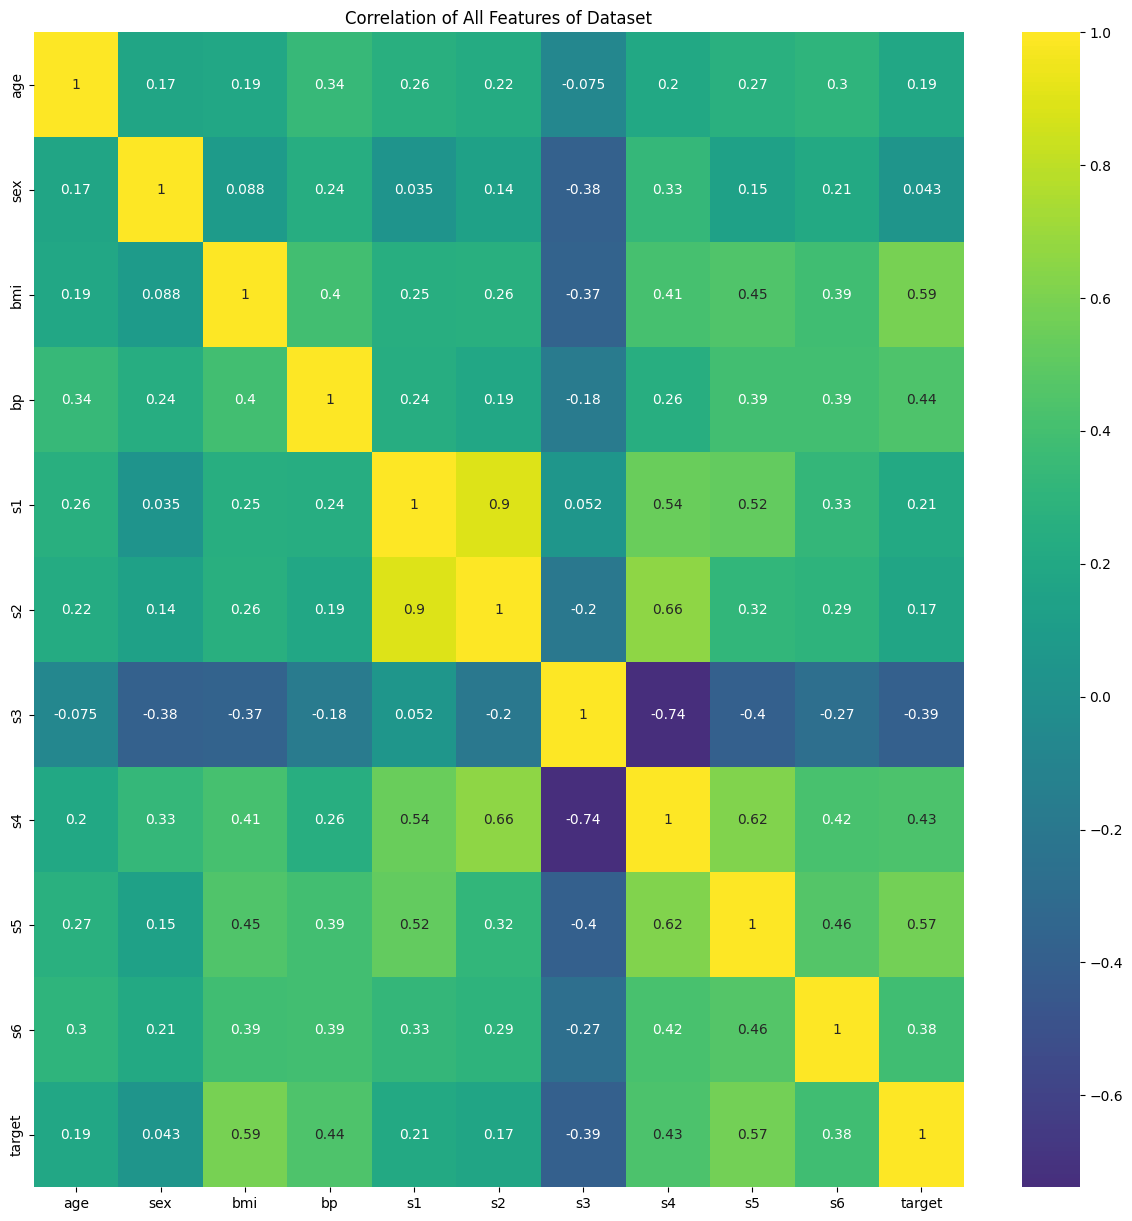

In [38]:
plt.figure(figsize=(15, 15))

# put your answer here

sns.heatmap(correlation, annot = True, cmap = 'viridis', center=0)
plt.title('Correlation of All Features of Dataset')
plt.show


3. Split the data set into a training and test set. `(5 points)`

In [39]:
# put your answer here

X = df.drop (['target'], axis =1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=170)

4. Use the `the MinMaxScaler()` method to scale down the training and test set. `(5 points)`

In [40]:
# put your answer here

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

5. Create a new instance of the `LinearRegression` class. `(5 points)`

In [41]:
# put your answer here

model = LinearRegression()

6. Use the `fit()` method to train the linear regression model using the scaled training set. `(5 points)`

In [42]:
# put your answer here

model.fit(X_train_scaled, y_train)

LinearRegression()

7. Use the `predict()` method to make predictions using the scaled test set. `(5 points)`

In [43]:
# put your answer here

y_predict = model.predict(X_test_scaled)

8. Display the intercept, slope and $R^2$. `(5 points)`

In [44]:
# put your answer here

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Score: {mse}')
print(f'R2 Score: {r2}')


Mean Score: 1901.0921285505372
R2 Score: 0.731070817899728


9. Write a `normal_equation()` function that will return the intercept and coefficients/slopes. `(5 points)`

In [45]:
# put your answer here

def lg_normal_equation(X, y):
  ones = np.ones((X.shape[0], 1))
  X = np.append(ones, X, axis =1)
  result = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
  return result, result[0], result[1:]

10. Call the `normal_equation()` function and pass the scaled training set. Display the intercept and slopes. `(5 points)`

In [46]:
# Put your answer here

result, b, m = lg_normal_equation(X,y)

print('Result:', result)
print('Intercept: ', b)
print('Slopes/Coefficients: ', m)

Result: [-3.34567139e+02 -3.63612242e-02 -2.28596481e+01  5.60296209e+00
  1.11680799e+00 -1.08999633e+00  7.46450456e-01  3.72004715e-01
  6.53383194e+00  6.84831250e+01  2.80116989e-01]
Intercept:  -334.56713852472603
Slopes/Coefficients:  [-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
